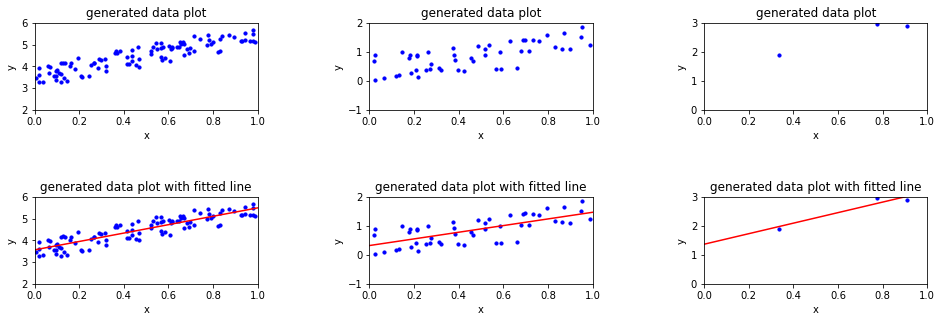

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression Using Gradient Descent.
class LinearRegressionUsingGD:
    """
    eta : learning rate
    iterations : number of iterations
    weight_ : weights of feature space
    cost_ : total error
    """

    def __init__(self, eta=0.05, iterations=1000):
        self.eta = eta
        self.iterations = iterations

    def fit(self, x, y):
        """
        x : intput array, shape: (instance number, feature number)
        y : label array, shape: (instance number, label)
        """

        self.cost_ = []
        self.weight_ = np.zeros((x.shape[1], 1))
        d = x.shape[0] # the dimension of feature space

        for _ in range(self.iterations): 
            residuals = np.dot(x, self.weight_) - y
            self.weight_ -= (self.eta / d) * np.dot(x.T, residuals) # gradient descent
            cost = np.sum((residuals ** 2)) / (2 * d)
            self.cost_.append(cost)
        return self

    def predict(self, x):
        """
        x : intput array, shape: (1, feature number)
        """
        return np.dot(x, self.weight_) # a scalor
 

# Linear Regression Using Least Square.
class LinearRegressionUsingLS:
    """
    Formula used: weight = inv(X.T * X) * X.T * Y
    weight_: the weight of feature space
    """

    def __init__(self):
        self = self
        
    def fit(self, x, y):
        """
        x : intput array, shape: (instance number, feature number)
        y : label array, shape: (instance number, label)
        """
        inverse = np.linalg.inv(np.matmul(x.transpose(),x))
        self.weight_ = np.matmul(np.matmul(inverse,x.transpose()),y)
        
        return self

    def predict(self, x):
        """
        x : intput array, shape: (1, feature number)
        """
        return np.dot(x,self.weight_) # a scalor

# generate random data-set
np.random.seed(0)
x_1 = np.random.rand(100, 1)
y_1 = 2 * x_1 + (np.random.rand(100, 1)-1/2) + 3
b_1 = np.ones((len(x_1),1))
x_1_b = np.concatenate((x_1,b_1),axis=1)

x_2 = np.random.rand(50, 1)
y_2 = x_2**2 + (np.random.rand(50, 1)-1/2)
b_2 = np.ones((len(x_2),1))
x_2_b = np.concatenate((x_2,b_2),axis=1)

x_3 = np.random.rand(3, 1)
y_3 = 2 * x_3 + (np.random.rand(3, 1)-1/2) + 1
b_3 = np.ones((len(x_3),1))
x_3_b = np.concatenate((x_3,b_3),axis=1)

# linear regression
lr_1 = LinearRegressionUsingGD()
lr_2 = LinearRegressionUsingGD()
lr_3 = LinearRegressionUsingGD()
lr_1.fit(x_1_b,y_1)
lr_2.fit(x_2_b,y_2)
lr_3.fit(x_3_b,y_3)

# prepare for ploting the decision boundary
d = np.linspace(0,1,100) # points to set the x axis of decisiob boundary
x = np.zeros((len(d),1))
for i in range(len(d)): x[i][0] = d[i]
b = np.ones((len(x),1))
x_b = np.concatenate((x,b),axis=1)

y_1_ = np.zeros((len(x_b),1))
y_2_ = np.zeros((len(x_b),1))
y_3_ = np.zeros((len(x_b),1))

for i in range(len(x)):  
    y_1_[i] = lr_1.predict(x_b[i:i+1,:])
    y_2_[i] = lr_2.predict(x_b[i:i+1,:])
    y_3_[i] = lr_3.predict(x_b[i:i+1,:])


# plot
plt.figure(figsize = (16,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=1)
plt.subplot(331)
plt.title('generated data plot')
plt.scatter(x_1,y_1,s=10,c = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,1)
plt.ylim(int(y_1.min())-1,int(y_1.max())+1)

plt.subplot(334)
plt.title('generated data plot with fitted line')
plt.plot(x,y_1_, c= 'r')
plt.scatter(x_1,y_1,s=10, c = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,1)
plt.ylim(int(y_1.min())-1,int(y_1.max())+1)

plt.subplot(332)
plt.title('generated data plot')
plt.scatter(x_2,y_2,s=10,c = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,1)
plt.ylim(int(y_2.min())-1,int(y_2.max())+1)

plt.subplot(335)
plt.title('generated data plot with fitted line')
plt.plot(x,y_2_, c= 'r')
plt.scatter(x_2,y_2,s=10, c = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,1)
plt.ylim(int(y_2.min())-1,int(y_2.max())+1)

plt.subplot(333)
plt.title('generated data plot')
plt.scatter(x_3,y_3,s=10,c = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,1)
plt.ylim(int(y_3.min())-1,int(y_3.max())+1)

plt.subplot(336)
plt.title('generated data plot with fitted line')
plt.plot(x,y_3_, c= 'r')
plt.scatter(x_3,y_3,s=10, c = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,1)
plt.ylim(int(y_3.min())-1,int(y_3.max())+1)

plt.show()